In [5]:
#!python -m pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('E:\\New folder\\data set\\adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
# Get a count of each education
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


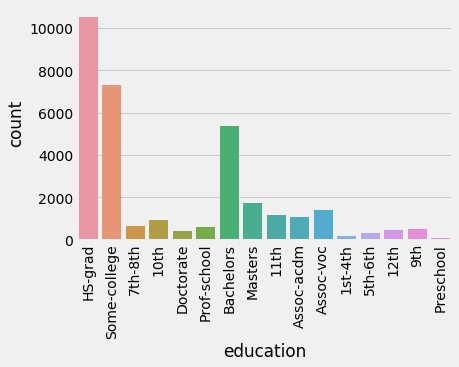

In [15]:
sns.countplot(df['education'],label='count')
plt.xticks(rotation = 90)
plt.show()

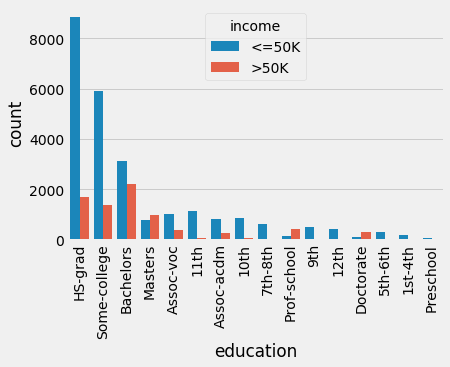

In [13]:
sns.countplot(x='education',hue='income',order=df['education'].value_counts().index,data=df)
plt.xticks(rotation=90)
plt.show()

In [7]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

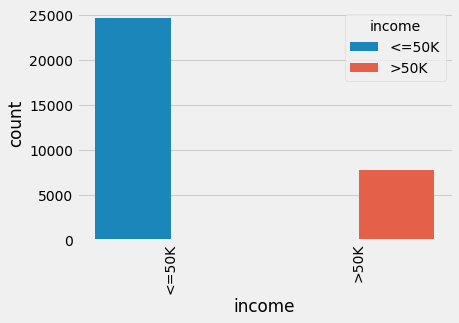

In [9]:
sns.countplot(x='income', hue='income',order=df['income'].value_counts().index,data=df)
plt.xticks(rotation=90)
plt.show()

In [19]:
categorical_keep_columns = ['income','age','workclass','education','relationship','marital.status']
df[categorical_keep_columns]

,income,age,workclass,education,relationship,marital.status
0,<=50K,90,?,HS-grad,Not-in-family,Widowed
1,<=50K,82,Private,HS-grad,Not-in-family,Widowed
2,<=50K,66,?,Some-college,Unmarried,Widowed
3,<=50K,54,Private,7th-8th,Unmarried,Divorced
4,<=50K,41,Private,Some-college,Own-child,Separated
...,...,...,...,...,...,...
32556,<=50K,22,Private,Some-college,Not-in-family,Never-married
32557,<=50K,27,Private,Assoc-acdm,Wife,Married-civ-spouse
32558,>50K,40,Private,HS-grad,Husband,Married-civ-spouse
32559,<=50K,58,Private,HS-grad,Unmarried,Widowed


In [20]:
keep_columns = ['age','workclass_num','education_num','relationship_num','marital.status_num']

In [21]:
dummies=pd.get_dummies(df[categorical_keep_columns])
dummies.head()

,age,income_<=50K,income_>50K,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed
0,90,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,82,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,66,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,54,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,41,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [25]:
dummies=dummies.drop('income_>50K',axis=1)
dummies.tail()

,age,income_<=50K,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed
32556,22,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
32558,40,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32559,58,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32560,22,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [26]:
x=dummies.drop('income_<=50K',axis=1)
y=dummies['income_<=50K']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.2,random_state=10)

In [41]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   32561 non-null  int64
 1   income_<=50K                          32561 non-null  uint8
 2   workclass_?                           32561 non-null  uint8
 3   workclass_Federal-gov                 32561 non-null  uint8
 4   workclass_Local-gov                   32561 non-null  uint8
 5   workclass_Never-worked                32561 non-null  uint8
 6   workclass_Private                     32561 non-null  uint8
 7   workclass_Self-emp-inc                32561 non-null  uint8
 8   workclass_Self-emp-not-inc            32561 non-null  uint8
 9   workclass_State-gov                   32561 non-null  uint8
 10  workclass_Without-pay                 32561 non-null  uint8
 11  education_10th                        325

In [42]:
from sklearn.naive_bayes import MultinomialNB
dr=MultinomialNB()
dr.fit(x_train,y_train)
dr.score(x_train,y_train)


0.7789081695331695

In [43]:
x.columns

Index(['age', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
 

In [53]:
np.where(x.columns=='marital.status_Never-married')[0][0]


36

In [59]:
def predict_price(age,workclass,education,relationship,marital):
    workclass_ind = np.where(x.columns==workclass)[0][0]
    education_ind= np.where(x.columns==education)[0][0]
    relationship_ind= np.where(x.columns==relationship)[0][0]
    marital_ind= np.where(x.columns==marital)[0][0]


    z = np.zeros(len(x.columns))
    z[0] = age
    if workclass_ind >= 0 and education_ind >= 0 and relationship_ind >=0 and marital_ind >= 0:
        z[[workclass_ind,education_ind,relationship_ind,marital_ind]] = 1
    dr.predict([z])[0]
    if dr.predict([z])[0] == 1:
        return 'income_<=50K'
    else :
        return 'income_>50K'


In [60]:
predict_price(23,'workclass_?','education_HS-grad','relationship_Unmarried','marital.status_Never-married')

'income_<=50K'